In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df_economic = pd.read_csv('/content/economic_indicators2.csv')

In [133]:
df_economic.head()

,country_code,year,FDI_Net_CurrentUD,FDI_NetInflows_PercentGDP,FDI_NetInflows_CurrentUD,FDI_NetOutflows_PercentGDP,FDI_NetOutflows_CurrentUD,GDP_CurrentUD,GDP_Growth_Percent,General_government_final_consumption_expenditure_CurrentUD,...,Gross_National_Expenditure_CurrentUD,Inflation_ConsumerPrices_AnnualPercent,Inflation_GDPDeflator_AnnualPercent,Inflation_GDPDeflator_AnnualPercent_LinkedSeries,MilitaryExpenditure_CurrentUD,Net_Trade_Goods_CurrentUD,Net_Trade_GoodsandServices_CurrentUD,Trade_PercentGDP,TradeServices_PercentGDP,id
0,ABW,2021,-138400826.4,4.558715,1.335451e+08,-0.165755,-4.855705e+06,2.929447e+09,24.132627,6.688426e+08,...,3.091606e+09,0.000000,-4.912625,-4.912625,0.000000e+00,-9.378829e+08,253587682.8,147.015576,101.195727,NaN
1,ABW,2022,-124694278.1,7.567072,2.481503e+08,3.764656,1.234560e+08,3.279344e+09,8.517918,6.954755e+08,...,3.205349e+09,0.000000,3.157279,3.157279,0.000000e+00,-1.165472e+09,423839378.9,172.884171,113.001287,NaN
2,ABW,2023,0.0,2.506331,9.144533e+07,2.506331,9.144533e+07,3.648573e+09,4.263719,7.137512e+08,...,3.397212e+09,0.000000,6.709461,6.709461,0.000000e+00,0.000000e+00,0.0,169.798283,0.000000,NaN
3,AFE,2021,0.0,5.012059,5.355281e+10,0.023504,2.075048e+08,1.085750e+12,4.576393,1.590750e+11,...,1.085620e+12,7.240978,6.222699,0.000000,1.143168e+10,0.000000e+00,0.0,55.562396,8.401530,NaN
4,AFE,2022,0.0,1.695914,1.989492e+10,0.433242,3.965473e+09,1.191420e+12,3.553878,1.719200e+11,...,1.211710e+12,10.773751,9.358767,0.000000,1.212065e+10,0.000000e+00,0.0,58.536163,10.112011,NaN


# **Check for missing values**

In [134]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country_code                                                798 non-null    object 
 1   year                                                        798 non-null    int64  
 2   FDI_Net_CurrentUD                                           798 non-null    float64
 3   FDI_NetInflows_PercentGDP                                   798 non-null    float64
 4   FDI_NetInflows_CurrentUD                                    798 non-null    float64
 5   FDI_NetOutflows_PercentGDP                                  798 non-null    float64
 6   FDI_NetOutflows_CurrentUD                                   798 non-null    float64
 7   GDP_CurrentUD                                               798 non-null    float64
 8   

# **Drop Empty ID row**

In [135]:
df_economic = df_economic.drop(columns=['id'])


In [136]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country_code                                                798 non-null    object 
 1   year                                                        798 non-null    int64  
 2   FDI_Net_CurrentUD                                           798 non-null    float64
 3   FDI_NetInflows_PercentGDP                                   798 non-null    float64
 4   FDI_NetInflows_CurrentUD                                    798 non-null    float64
 5   FDI_NetOutflows_PercentGDP                                  798 non-null    float64
 6   FDI_NetOutflows_CurrentUD                                   798 non-null    float64
 7   GDP_CurrentUD                                               798 non-null    float64
 8   

In [137]:
missing_values = df_economic.isna().sum()
print(missing_values)

country_code                                                  0
year                                                          0
FDI_Net_CurrentUD                                             0
FDI_NetInflows_PercentGDP                                     0
FDI_NetInflows_CurrentUD                                      0
FDI_NetOutflows_PercentGDP                                    0
FDI_NetOutflows_CurrentUD                                     0
GDP_CurrentUD                                                 0
GDP_Growth_Percent                                            0
General_government_final_consumption_expenditure_CurrentUD    0
Gini_Index                                                    0
Gross_National_Expenditure_CurrentUD                          0
Inflation_ConsumerPrices_AnnualPercent                        0
Inflation_GDPDeflator_AnnualPercent                           0
Inflation_GDPDeflator_AnnualPercent_LinkedSeries              0
MilitaryExpenditure_CurrentUD           

# check for duplicates

In [138]:
# Check for duplicate rows in the dataset
duplicate_count = df_economic.duplicated().sum()

# Display the number of duplicate rows found
duplicate_count


0

# **Check for large negative FDI and GDP**

In [139]:
print(invalid_rows[['country_code', 'year', 'FDI_Net_CurrentUD', 'GDP_CurrentUD']]
      .sort_values(by='FDI_Net_CurrentUD'))


    country_code  year  FDI_Net_CurrentUD  GDP_CurrentUD
120          CHN  2021      -1.652770e+11   1.782050e+13
753          USA  2021      -1.338510e+11   2.368120e+13
626          SGP  2023      -1.122440e+11   5.014280e+11
625          SGP  2022      -9.653341e+10   4.984750e+11
624          SGP  2021      -7.590128e+10   4.341120e+11
..           ...   ...                ...            ...
782          WSM  2023      -2.396342e+06   9.381894e+08
372          KIR  2021      -9.299932e+05   2.893393e+08
735          TUV  2021      -9.152277e+05   6.019641e+07
465          MHL  2021      -4.994284e+05   2.589000e+08
717          TON  2021      -3.172707e+05   5.182280e+08

[409 rows x 4 columns]


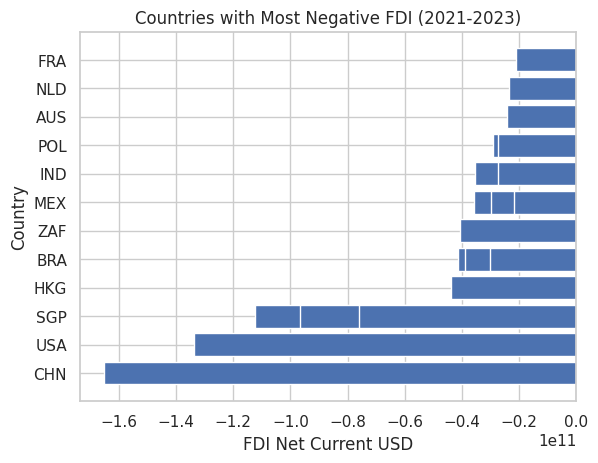

In [140]:
import matplotlib.pyplot as plt

worst_fdi = invalid_rows.sort_values(by='FDI_Net_CurrentUD').head(20)
plt.barh(worst_fdi['country_code'], worst_fdi['FDI_Net_CurrentUD'])
plt.xlabel("FDI Net Current USD")
plt.ylabel("Country")
plt.title("Countries with Most Negative FDI (2021-2023)")
plt.show()


In [141]:
print(df_economic.describe())


              year  FDI_Net_CurrentUD  FDI_NetInflows_PercentGDP  \
count   798.000000       7.980000e+02                 798.000000   
mean   2022.000000       2.213075e+09                   3.508787   
std       0.817009       3.073712e+10                  23.999326   
min    2021.000000      -1.652770e+11                -360.352806   
25%    2021.000000      -9.594585e+08                   0.163656   
50%    2022.000000      -4.076720e+06                   1.669290   
75%    2023.000000       0.000000e+00                   3.612222   
max    2023.000000       5.132950e+11                 433.860897   

       FDI_NetInflows_CurrentUD  FDI_NetOutflows_PercentGDP  \
count              7.980000e+02                  798.000000   
mean               5.069781e+10                    1.460328   
std                1.950210e+11                   21.835876   
min               -4.303350e+11                 -360.352806   
25%                1.765643e+07                    0.000000   
50%      

# cap extreme variables

In [142]:
df_economic['FDI_NetInflows_PercentGDP'] = df_economic['FDI_NetInflows_PercentGDP'].clip(-100, 100)
df_economic['FDI_NetOutflows_PercentGDP'] = df_economic['FDI_NetOutflows_PercentGDP'].clip(-100, 100)

df_economic['GDP_Growth_Percent'] = df_economic['GDP_Growth_Percent'].clip(-50, 50)

df_economic['Inflation_ConsumerPrices_AnnualPercent'] = df_economic['Inflation_ConsumerPrices_AnnualPercent'].clip(-10, 100)
df_economic['Inflation_GDPDeflator_AnnualPercent'] = df_economic['Inflation_GDPDeflator_AnnualPercent'].clip(-10, 100)
df_economic['Inflation_GDPDeflator_AnnualPercent_LinkedSeries'] = df_economic['Inflation_GDPDeflator_AnnualPercent_LinkedSeries'].clip(-10, 100)

df_economic['Net_Trade_Goods_CurrentUD'] = df_economic['Net_Trade_Goods_CurrentUD'].clip(-5e11, 5e11)
df_economic['Net_Trade_GoodsandServices_CurrentUD'] = df_economic['Net_Trade_GoodsandServices_CurrentUD'].clip(-5e11, 5e11)
df_economic['FDI_Net_CurrentUD'] = df_economic['FDI_Net_CurrentUD'].clip(-1e11, 1e11)


In [143]:
numeric_cols = [
    'GDP_CurrentUD', 'Gross_National_Expenditure_CurrentUD',
    'General_government_final_consumption_expenditure_CurrentUD',
    'Trade_PercentGDP', 'TradeServices_PercentGDP'
]
df_economic[numeric_cols] = df_economic[numeric_cols].fillna(df_economic[numeric_cols].median())

zero_fill_cols = [
    'FDI_Net_CurrentUD', 'FDI_NetInflows_CurrentUD', 'FDI_NetOutflows_CurrentUD',
    'MilitaryExpenditure_CurrentUD', 'Net_Trade_Goods_CurrentUD', 'Net_Trade_GoodsandServices_CurrentUD'
]
df_economic[zero_fill_cols] = df_economic[zero_fill_cols].fillna(0)


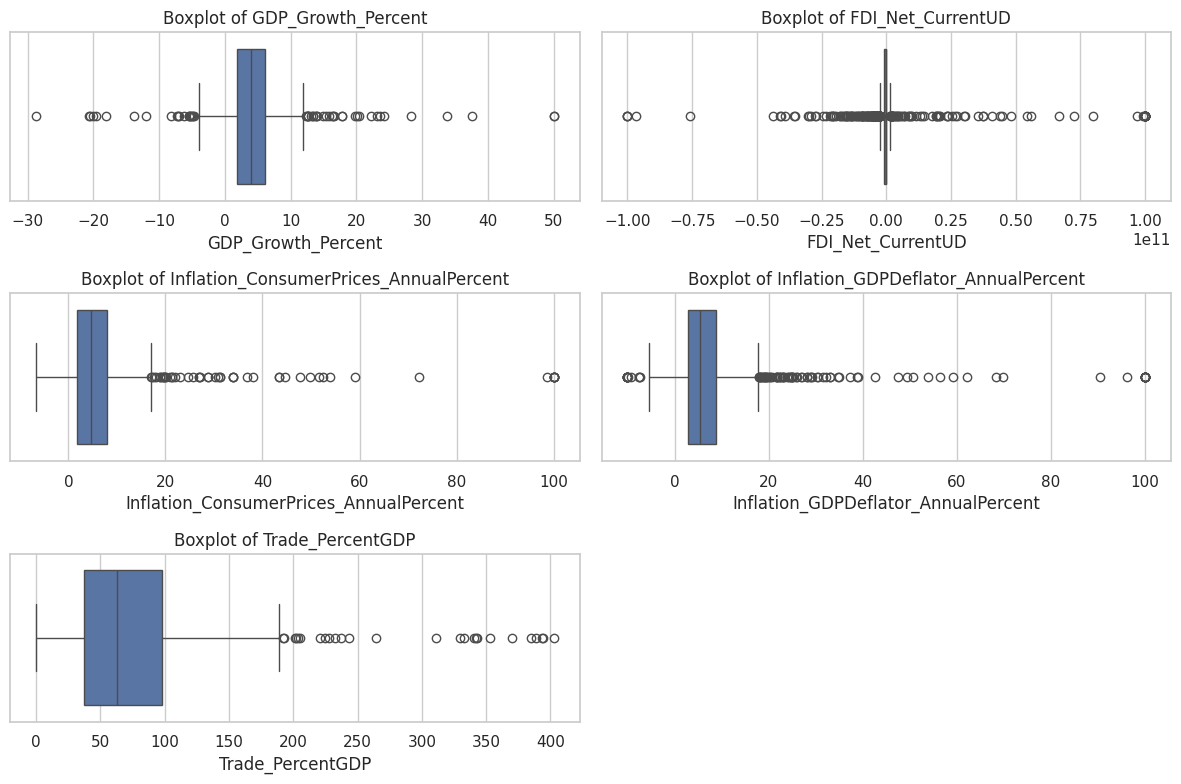

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables to check for outliers
columns_to_plot = [
    'GDP_Growth_Percent', 'FDI_Net_CurrentUD', 'Inflation_ConsumerPrices_AnnualPercent',
    'Inflation_GDPDeflator_AnnualPercent', 'Trade_PercentGDP'
]

# Generate box plots to visualize outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_economic[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# Additional cleaning using log

In [145]:
log_columns = [
    'FDI_Net_CurrentUD', 'FDI_NetInflows_CurrentUD', 'FDI_NetOutflows_CurrentUD',
    'GDP_CurrentUD', 'Gross_National_Expenditure_CurrentUD',
    'MilitaryExpenditure_CurrentUD', 'Net_Trade_Goods_CurrentUD', 'Net_Trade_GoodsandServices_CurrentUD'
]

df_economic[log_columns] = df_economic[log_columns].apply(lambda x: np.sign(x) * np.log1p(np.abs(x)))

print(df_economic.head())


  country_code  year  FDI_Net_CurrentUD  FDI_NetInflows_PercentGDP  \
0          ABW  2021         -18.745665                   4.558715   
1          ABW  2022         -18.641376                   7.567072   
2          ABW  2023           0.000000                   2.506331   
3          AFE  2021           0.000000                   5.012059   
4          AFE  2022           0.000000                   1.695914   

   FDI_NetInflows_CurrentUD  FDI_NetOutflows_PercentGDP  \
0                 18.709950                   -0.165755   
1                 19.329545                    3.764656   
2                 18.331252                    2.506331   
3                 24.703934                    0.023504   
4                 23.713730                    0.433242   

   FDI_NetOutflows_CurrentUD  GDP_CurrentUD  GDP_Growth_Percent  \
0                 -15.395665      21.798079           24.132627   
1                  18.631395      21.910909            8.517918   
2                  18.3

# Cap trade percent GDP at 200

In [146]:
df_economic['Trade_PercentGDP'] = df_economic['Trade_PercentGDP'].clip(0, 200)


In [147]:
# Variables that need Log Transformation
log_columns = [
    'FDI_NetInflows_CurrentUD',
    'GDP_CurrentUD',
    'MilitaryExpenditure_CurrentUD'
]



# Cleaned boxplots

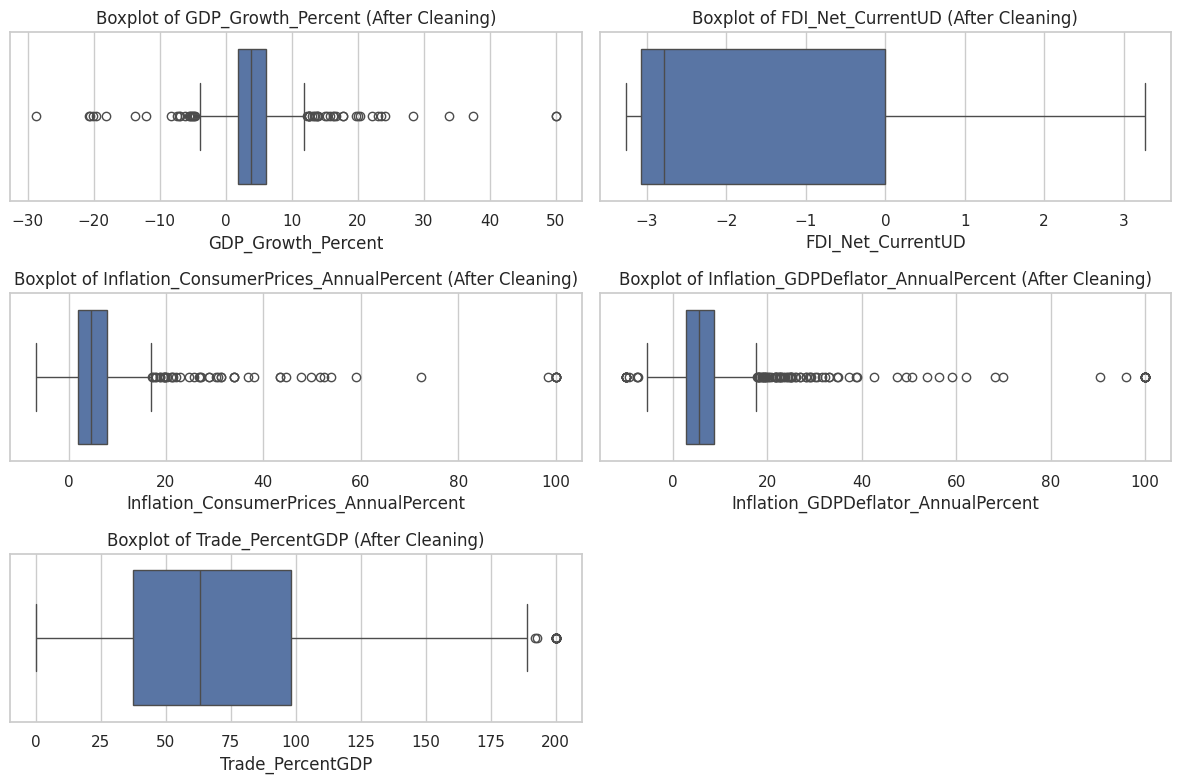

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_economic['FDI_Net_CurrentUD'] = np.log1p(df_economic['FDI_Net_CurrentUD'].abs()) * np.sign(df_economic['FDI_Net_CurrentUD'])
df_economic['Trade_PercentGDP'] = df_economic['Trade_PercentGDP'].clip(0, 200)

columns_to_plot = [
    'GDP_Growth_Percent', 'FDI_Net_CurrentUD', 'Inflation_ConsumerPrices_AnnualPercent',
    'Inflation_GDPDeflator_AnnualPercent', 'Trade_PercentGDP'
]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_economic[col])
    plt.title(f"Boxplot of {col} (After Cleaning)")

plt.tight_layout()
plt.show()


# **Apply robust scaler **

In [149]:
from sklearn.preprocessing import RobustScaler

# Select numerical columns for standardization
columns_to_standardize = [
    'FDI_Net_CurrentUD', 'FDI_NetInflows_PercentGDP',
    'FDI_NetOutflows_PercentGDP', 'FDI_NetOutflows_CurrentUD',
    'GDP_Growth_Percent', 'Inflation_GDPDeflator_AnnualPercent',
    'Inflation_ConsumerPrices_AnnualPercent', 'Trade_PercentGDP',
    'TradeServices_PercentGDP', 'Net_Trade_Goods_CurrentUD',
    'Net_Trade_GoodsandServices_CurrentUD', 'Gross_National_Expenditure_CurrentUD'
]

# Apply RobustScaler
scaler = RobustScaler()
df_economic[columns_to_standardize] = scaler.fit_transform(df_economic[columns_to_standardize])

# Display first few rows to check
print(df_economic.head())


  country_code  year  FDI_Net_CurrentUD  FDI_NetInflows_PercentGDP  \
0          ABW  2021          -0.063919                   0.837863   
1          ABW  2022          -0.062197                   1.710213   
2          ABW  2023           0.905675                   0.242721   
3          AFE  2021           0.905675                   0.969321   
4          AFE  2022           0.905675                   0.007720   

   FDI_NetInflows_CurrentUD  FDI_NetOutflows_PercentGDP  \
0                 18.709950                   -0.328047   
1                 19.329545                    3.485547   
2                 18.331252                    2.264621   
3                 24.703934                   -0.144413   
4                 23.713730                    0.253147   

   FDI_NetOutflows_CurrentUD  GDP_CurrentUD  GDP_Growth_Percent  \
0                  -1.491387      21.798079            4.869575   
1                   0.022624      21.910909            1.110133   
2                   0.0

<function matplotlib.pyplot.show(close=None, block=None)>

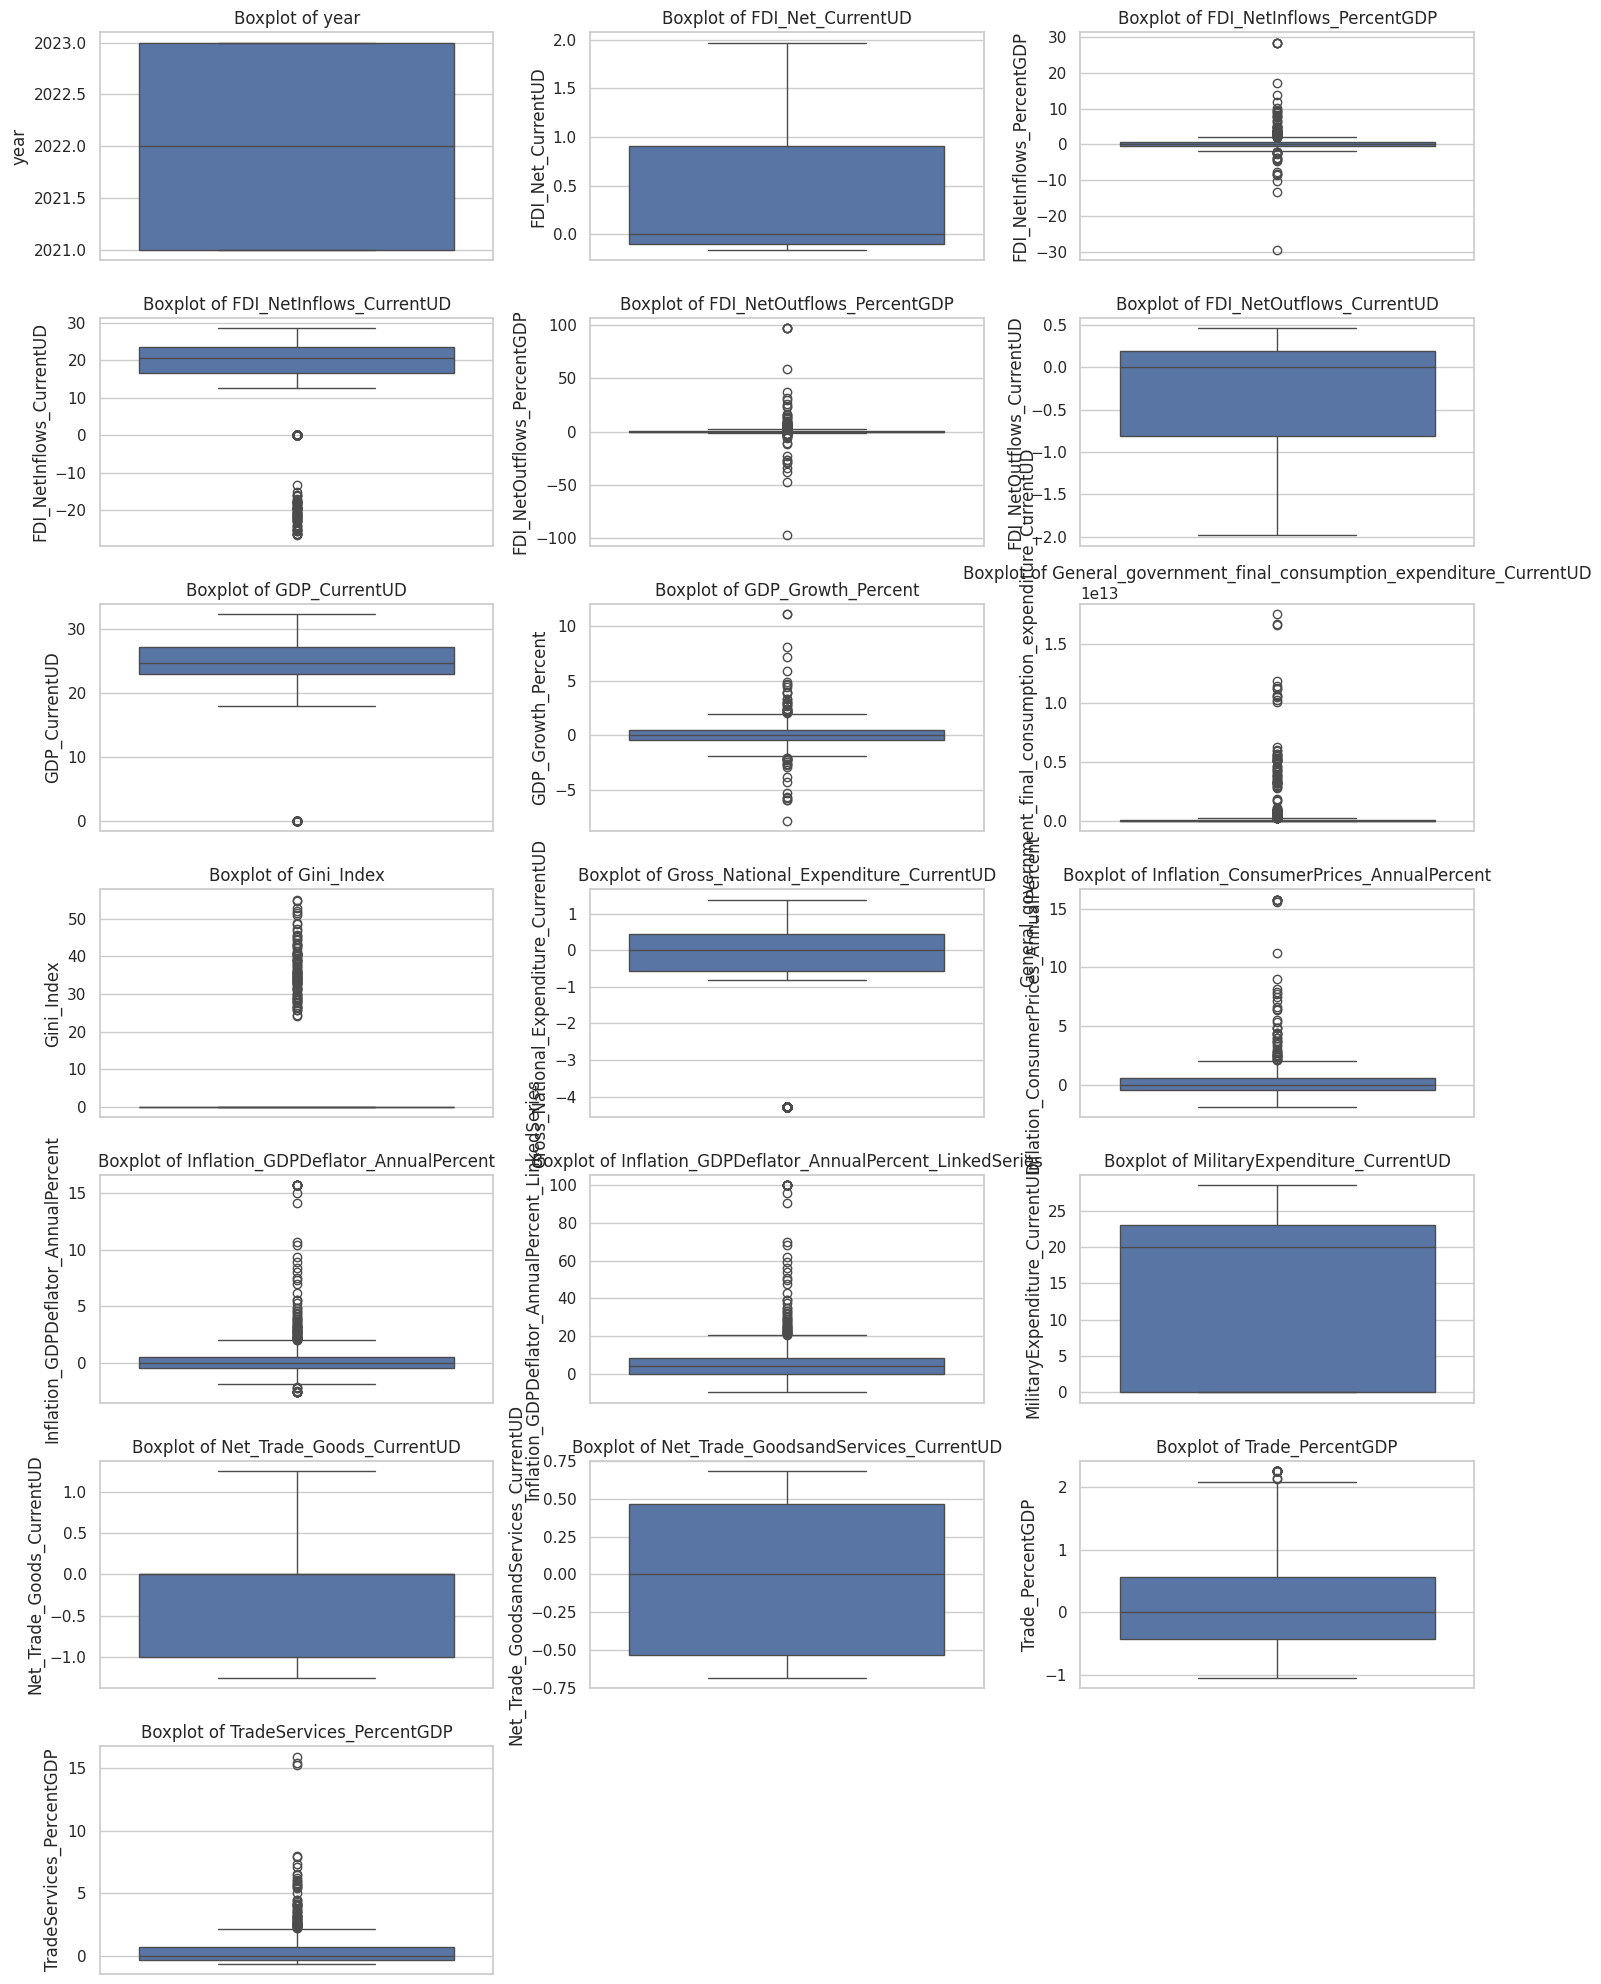

In [150]:
plt.figure(figsize=(15, 20))

# Loop through all numerical columns and create a box plot for each
for i, col in enumerate(df_economic.select_dtypes(include=['number']).columns, 1):
    plt.subplot(len(df_economic.select_dtypes(include=['number']).columns) // 3 + 1, 3, i)
    sns.boxplot(y=df_economic[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show

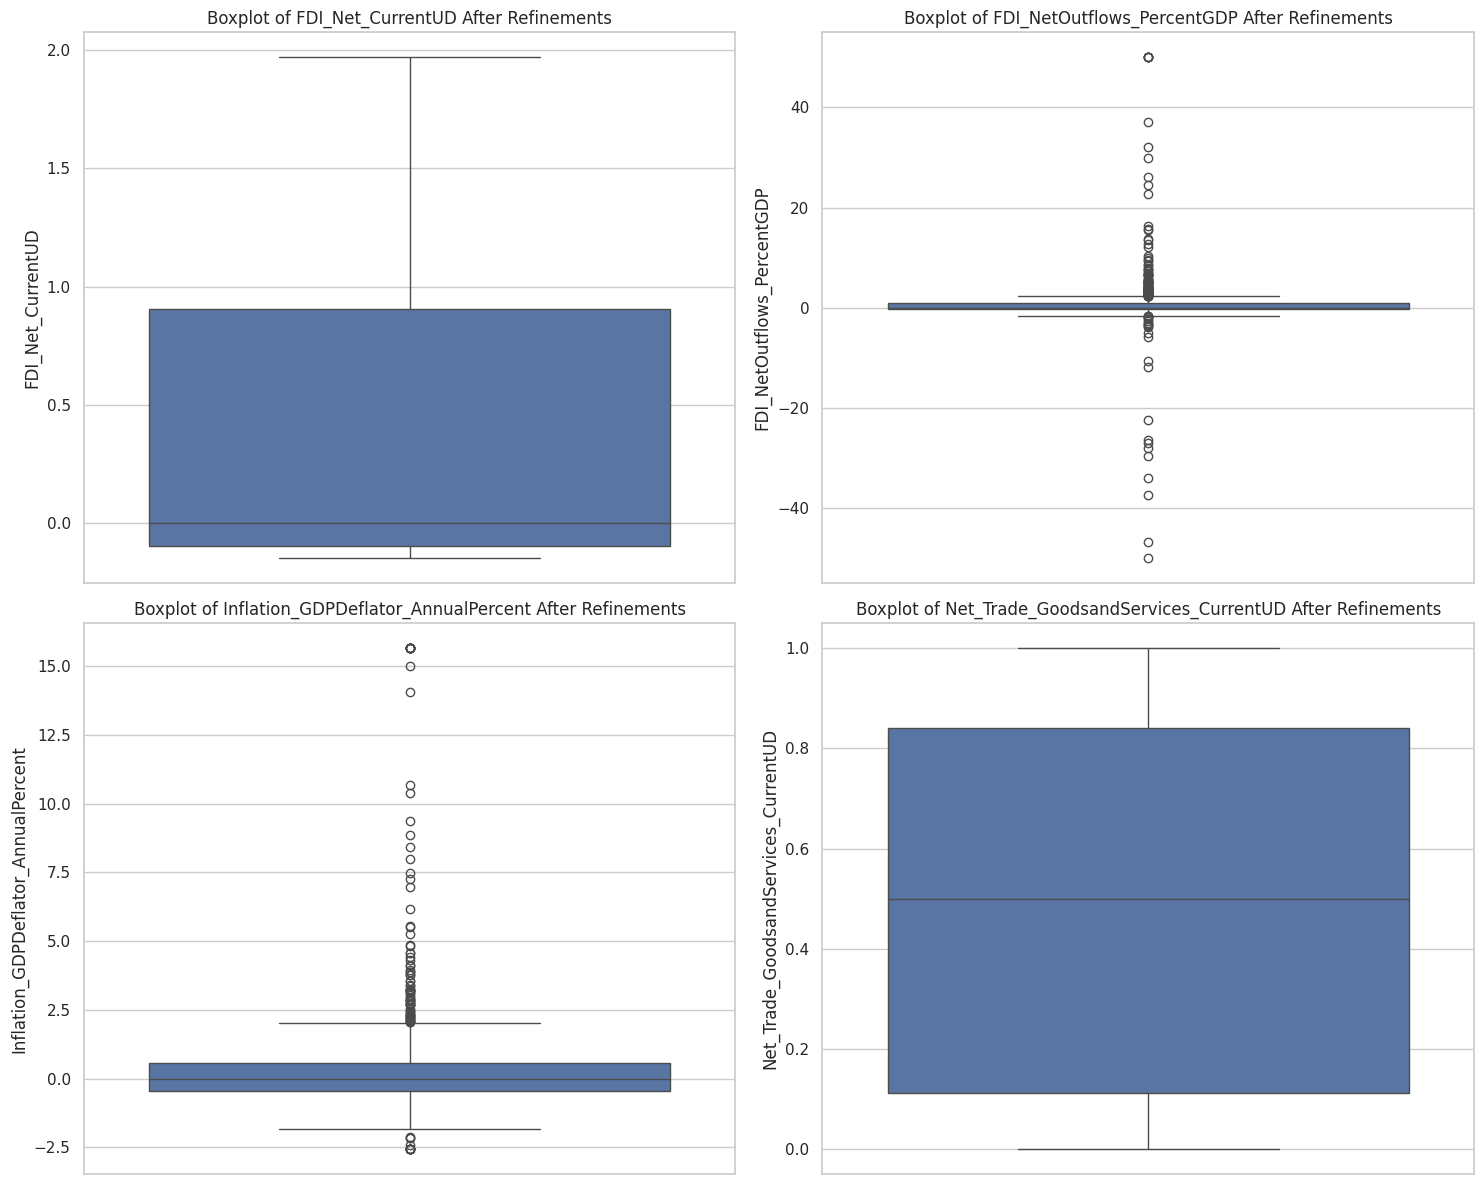

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

# Apply final refinements to the dataset

# Winsorization to reduce extreme outliers
df_economic['FDI_Net_CurrentUD'] = winsorize(df_economic['FDI_Net_CurrentUD'], limits=[0.01, 0.01])
df_economic['Inflation_GDPDeflator_AnnualPercent'] = winsorize(df_economic['Inflation_GDPDeflator_AnnualPercent'], limits=[0.01, 0.01])
df_economic['FDI_NetOutflows_PercentGDP'] = df_economic['FDI_NetOutflows_PercentGDP'].clip(-50, 50)

# Apply MinMax Scaling for Net_Trade_GoodsandServices_CurrentUD
scaler = MinMaxScaler()
df_economic[['Net_Trade_GoodsandServices_CurrentUD']] = scaler.fit_transform(df_economic[['Net_Trade_GoodsandServices_CurrentUD']])

# Generate box plots again to visualize improvements
plt.figure(figsize=(15, 12))

columns_to_plot = [
    'FDI_Net_CurrentUD', 'FDI_NetOutflows_PercentGDP',
    'Inflation_GDPDeflator_AnnualPercent', 'Net_Trade_GoodsandServices_CurrentUD'
]

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_economic[col])
    plt.title(f'Boxplot of {col} After Refinements')

plt.tight_layout()
plt.show()


In [152]:
print(df_economic.describe())

              year  FDI_Net_CurrentUD  FDI_NetInflows_PercentGDP  \
count   798.000000         798.000000                 798.000000   
mean   2022.000000           0.526041                   0.424959   
std       0.817009           0.705227                   2.950080   
min    2021.000000          -0.146103                 -29.481611   
25%    2021.000000          -0.094325                  -0.436597   
50%    2022.000000           0.000000                   0.000000   
75%    2023.000000           0.905675                   0.563403   
max    2023.000000           1.968791                  28.513504   

       FDI_NetInflows_CurrentUD  FDI_NetOutflows_PercentGDP  \
count                798.000000                  798.000000   
mean                  15.592620                    0.818320   
std                   13.246356                    6.342633   
min                  -26.787830                  -50.000000   
25%                   16.686611                   -0.167218   
50%      

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [155]:
from google.colab import files

df_economic.to_csv('processed_economic_data.csv', index=False)

files.download('processed_economic_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>